In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cinema= pd.read_csv(r"C:\Users\manhphi2811\OneDrive - National Economics University\Học Kỳ 6\Big data\final_dataset.xlsx - Final.csv")

C:\Users\manhphi2811\AppData\Local\Temp\ipykernel_8880\1653956951.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  cinema= pd.read_csv(r"C:\Users\manhphi2811\OneDrive - National Economics University\Học Kỳ 6\Big data\final_dataset.xlsx - Final.csv")


In [3]:
cinema.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35474 entries, 0 to 35473
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Mã order             35474 non-null  object
 1   Thu ngân             35474 non-null  object
 2   Ngày bán             35474 non-null  object
 3   Tổng                 35474 non-null  object
 4   Ngày/tháng/năm sinh  35473 non-null  object
 5   Tuổi                 35473 non-null  object
 6   Giới Tính            35474 non-null  object
 7   Quận/Huyện           35411 non-null  object
 8   Tỉnh                 35411 non-null  object
 9   Công việc            35474 non-null  object
 10  Lĩnh vực             35474 non-null  object
 11  Mã khách hàng        35474 non-null  object
 12  Mã vé                35474 non-null  int64 
 13  Ngày                 35474 non-null  object
 14  Thời gian            35474 non-null  object
 15  Chỗ ngồi             35474 non-null  object
 16  Phòn

In [4]:
cinema.head()

,Mã order,Thu ngân,Ngày bán,Tổng,Ngày/tháng/năm sinh,Tuổi,Giới Tính,Quận/Huyện,Tỉnh,Công việc,...,Phim,Mã phim,Đất nước,Thể loại phim,Phân loại phim,Thời lượng phim,Thể loại chỗ,Thể loại vé,Giá vé,Bỏng ngô
0,10006052019B0225,emp002,5/6/2019,90000,4/18/1999,20,Nữ,Thanh Khê,Đà Nẵng,Sinh viên,...,Avengers: Hồi Kết,s966,Hoa Kỳ,"Hành động phiêu lưu, Kỳ ảo, Khoa học viễn tưởng",C13,183,Đơn,Thành viên,45000,Không
1,10006052019B0225,emp002,5/6/2019,90000,4/18/1999,20,Nữ,Thanh Khê,Đà Nẵng,Sinh viên,...,Avengers: Hồi Kết,s966,Hoa Kỳ,"Hành động phiêu lưu, Kỳ ảo, Khoa học viễn tưởng",C13,183,Đơn,Thành viên,45000,Không
2,10022052019B0167,emp011,5/22/2019,90000,4/16/1998,21,Nam,Sơn Trà,Đà Nẵng,Sinh viên,...,John Wick 3: Chuẩn Bị Chiến Tranh (C18),s1231,Hoa Kỳ,Hành động,C18,131,Đơn,Thành viên,45000,Không
3,10022052019B0167,emp011,5/22/2019,90000,4/16/1998,21,Nam,Sơn Trà,Đà Nẵng,Sinh viên,...,John Wick 3: Chuẩn Bị Chiến Tranh (C18),s1231,Hoa Kỳ,Hành động,C18,131,Đơn,Thành viên,45000,Không
4,10130052019B0141,emp005,5/30/2019,90000,4/16/1998,21,Nam,Sơn Trà,Đà Nẵng,Sinh viên,...,Ngôi Đền Kỳ Quái (C18),s1232,Thái Lan,"Hài kịch, Kinh dị",C18,108,Đơn,Thành viên,45000,Không


# insight có thể rút ra
Nhóm khách hàng chính của rạp là ai? (độ tuổi, nghề nghiệp, giới tính,…)

Khung giờ vàng có lượng khách đông nhất là lúc nào?

Thể loại phim nào được yêu thích nhất?

Giá vé có ảnh hưởng đến độ tuổi hoặc đối tượng khách không?

Combo bắp ngô có phổ biến với một nhóm nhất định không?

Khu vực nào mang lại doanh thu cao nhất?

# Phân tích hành vi khách hàng
Histogram độ tuổi-Phân bố độ tuổi khách hàng 
Pie chart giới tính-Tỷ lệ nam/nữ
Bar chart nghề nghiệp hoặc lĩnh vực-Nghề nghiệp nào hay đi xem phim
Heatmap (Tỉnh × Tuổi hoặc Giới tính)-Khu vực nào có lượng khách hàng đặc trưng theo độ tuổi/giới

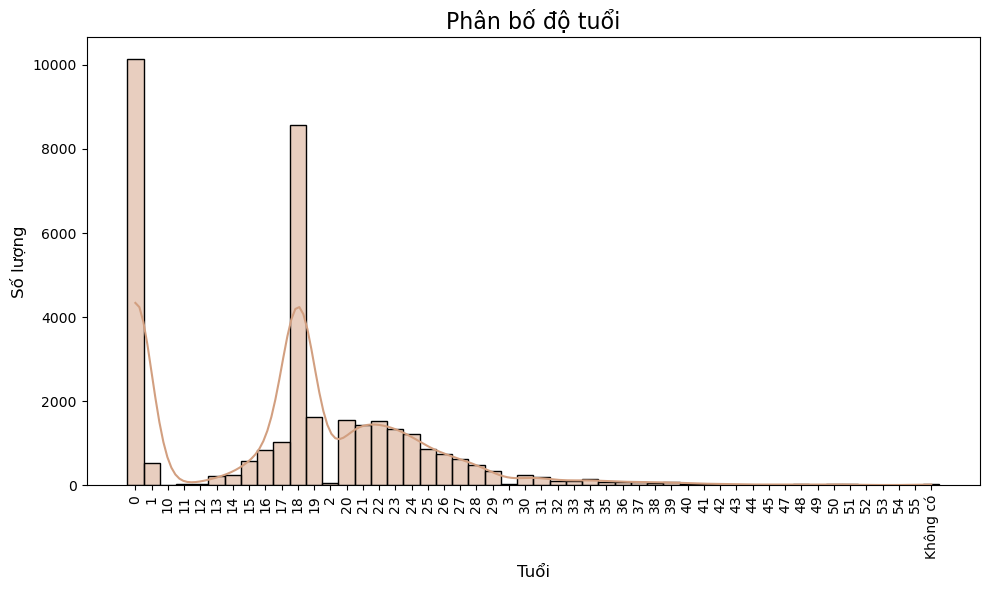

In [5]:
cinema_sorted = cinema.sort_values(by='Tuổi')

plt.figure(figsize=(10, 6))
sns.histplot(data=cinema_sorted, x='Tuổi', kde=True, bins=60, color='#D29F80', edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel('Tuổi', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.title('Phân bố độ tuổi', fontsize=16)
plt.tight_layout()
plt.grid(False)

plt.show()

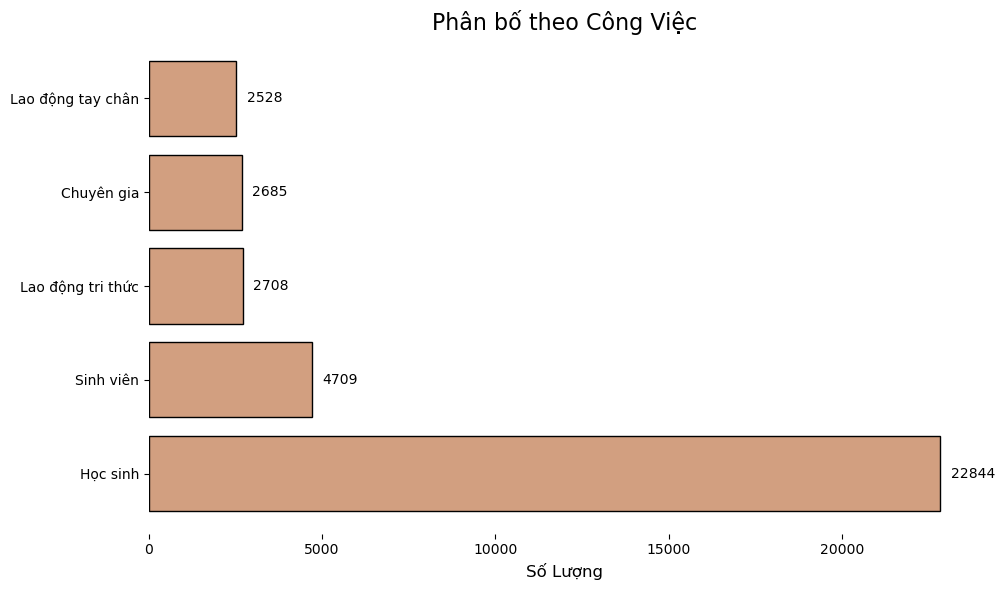

In [6]:

cinema_jobs = cinema['Công việc'].value_counts()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.barh(cinema_jobs.index, cinema_jobs.values, color='#D29F80', edgecolor='black',  )
plt.xlabel('Số Lượng', fontsize=12)
#plt.ylabel('Số lượng', fontsize=12)
plt.title('Phân bố theo Công Việc', fontsize=16)
plt.grid(False)
plt.tight_layout()
for i, v in enumerate(cinema_jobs.values):
    plt.text(v + 300, i, str(v), va='center', fontsize=10)
for spine in ['top', 'right', 'left', 'bottom']:
    plt.gca().spines[spine].set_visible(False)
plt.show()


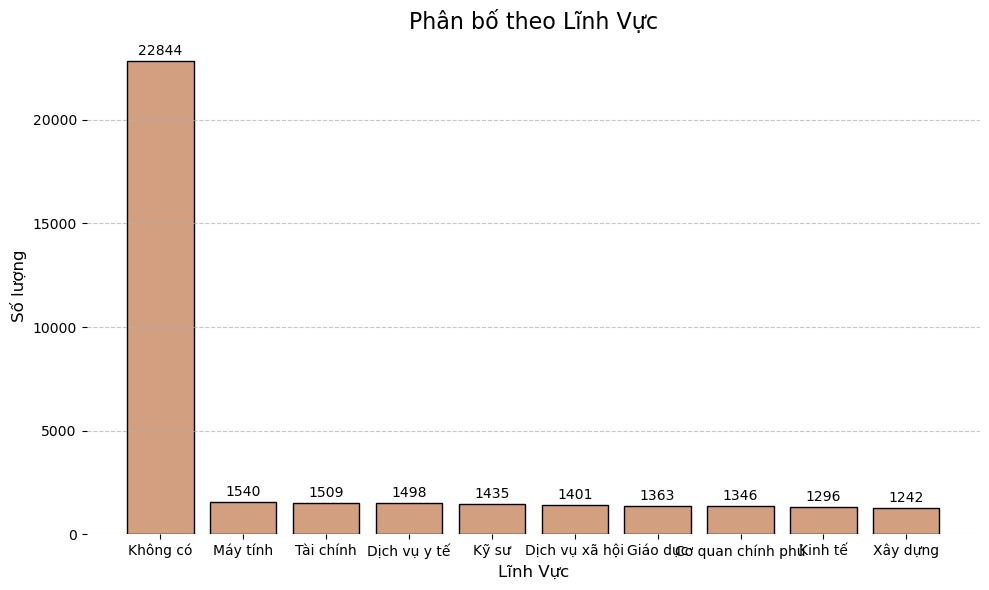

In [7]:
# Tính toán dữ liệu
cinema_fields = cinema['Lĩnh vực'].value_counts()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.bar(cinema_fields.index, cinema_fields.values, color='#D29F80', edgecolor='black')
plt.xlabel('Lĩnh Vực', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.title('Phân bố theo Lĩnh Vực', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Thêm giá trị trên mỗi cột
for i, v in enumerate(cinema_fields.values):
    plt.text(i, v + 300, str(v), ha='center', fontsize=10)

# Ẩn các viền
for spine in ['top', 'right', 'left', 'bottom']:
    plt.gca().spines[spine].set_visible(False)

plt.show()

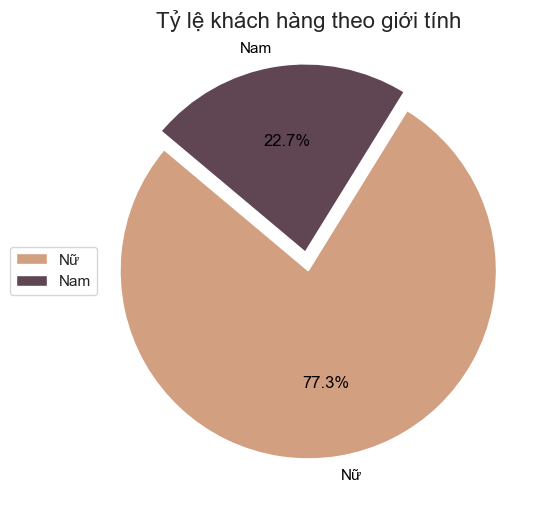

In [8]:
sns.set_theme(style="whitegrid")

counts = cinema['Giới Tính'].value_counts()
labels = counts.index

colors = ['#604652' if label == 'Nam' else '#D29F80' for label in labels]
explode = [0.1 if label == 'Nam' else 0 for label in labels]

# Vẽ biểu đồ
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    counts, labels=labels, colors=colors, autopct='%1.1f%%', 
    startangle=140, explode=explode, textprops={'color': 'black'}
)

# Thêm bảng chú giải (legend)
plt.legend(wedges, labels, title="Giới Tính", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Tiêu đề
plt.title('Tỷ lệ khách hàng theo giới tính', fontsize=16)
plt.tight_layout()
plt.legend(bbox_to_anchor=(-0.15,0.5), loc='center left')

plt.rcParams['font.family'] = 'Times New Roman'

plt.show()


Tổng hợp

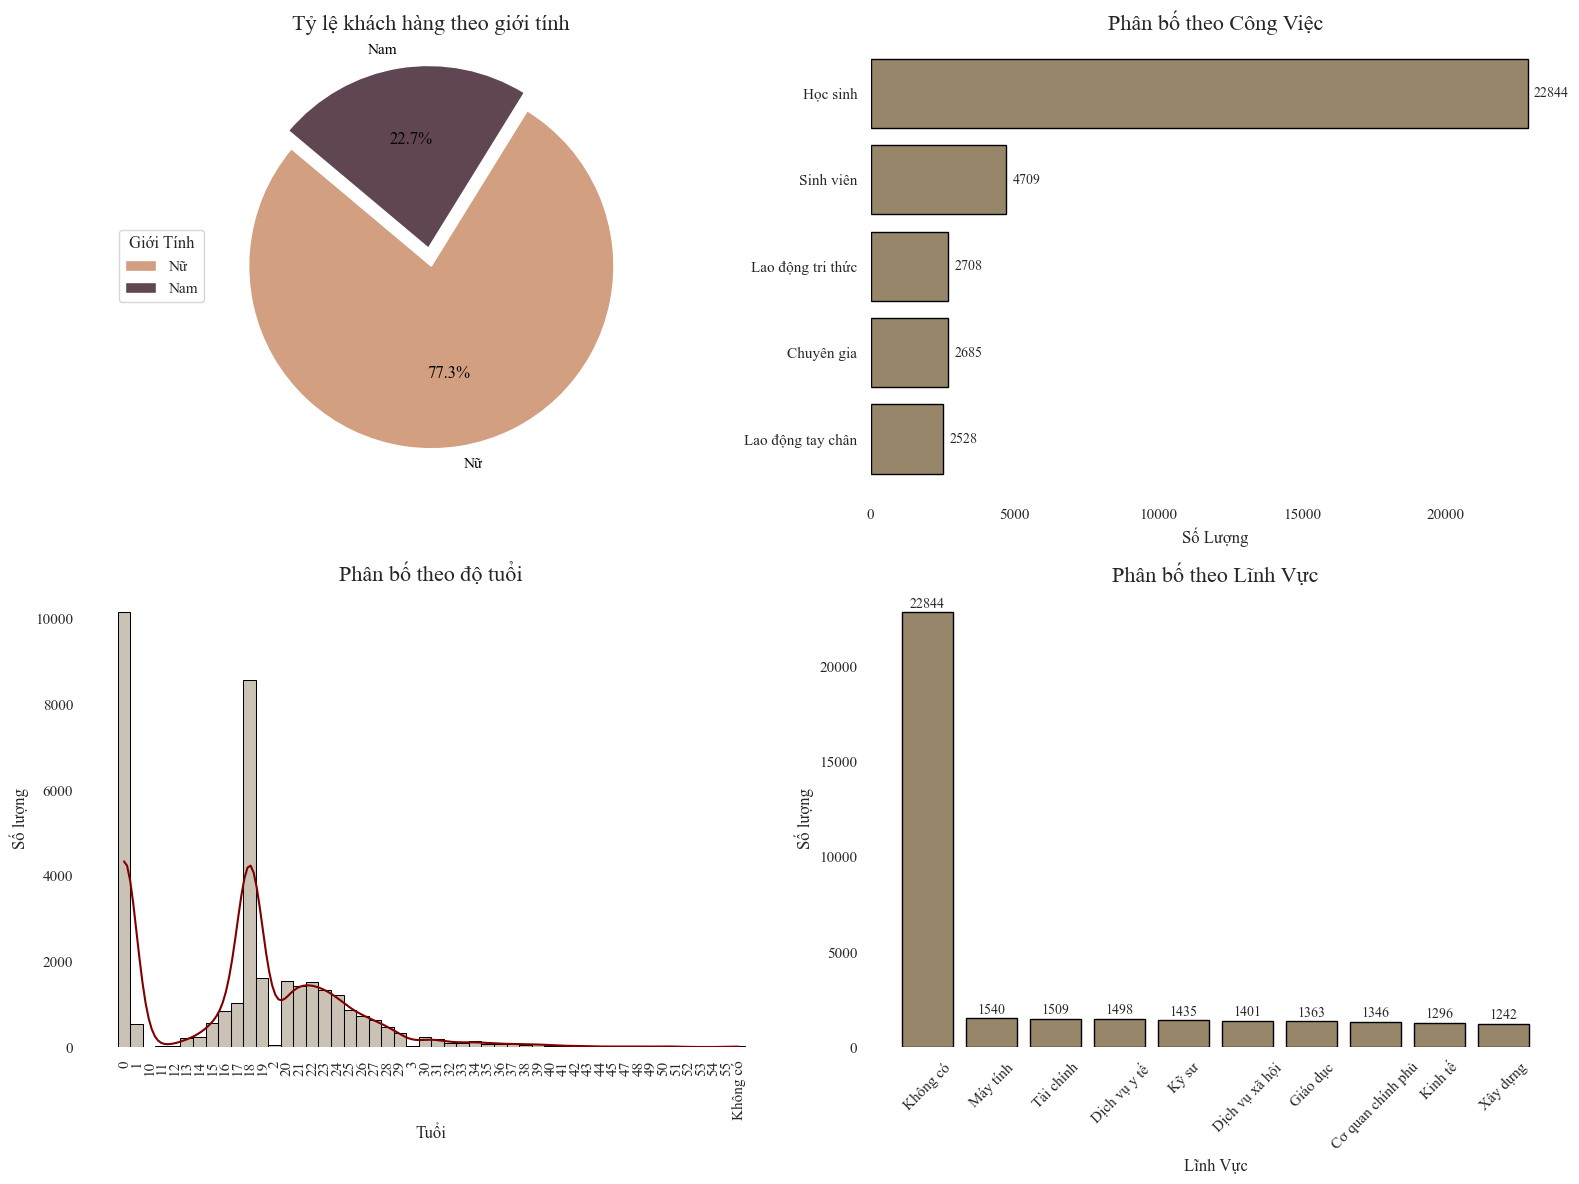

In [9]:

sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'Times New Roman'

fig, axs = plt.subplots(2, 2, figsize=(16, 12)) 
axs = axs.flatten() 
# Flatten để dễ truy cập
axs = axs.flatten()

# Chart 1: Pie giới tính
counts = cinema['Giới Tính'].value_counts()
labels = counts.index
colors = ['#604652' if label == 'Nam' else '#D29F80' for label in labels]
explode = [0.1 if label == 'Nam' else 0 for label in labels]
wedges, texts, autotexts = axs[0].pie(
    counts, labels=labels, colors=colors, autopct='%1.1f%%',
    startangle=140, explode=explode, textprops={'color': 'black'}
)
axs[0].set_title('Tỷ lệ khách hàng theo giới tính', fontsize=16)
axs[0].legend(wedges, labels, title="Giới Tính", loc="center left", bbox_to_anchor=(-0.2, 0.5))

# Chart 2: Barh công việc
cinema_jobs = cinema['Công việc'].value_counts()
axs[1].barh(cinema_jobs.index, cinema_jobs.values, color='#97866A', edgecolor='black')
axs[1].set_title('Phân bố theo Công Việc', fontsize=16)
axs[1].set_xlabel('Số Lượng', fontsize=12)
axs[1].invert_yaxis()
axs[1].grid(False)
for i, v in enumerate(cinema_jobs.values):
    axs[1].text(v + max(cinema_jobs.values)*0.01, i, str(v), va='center', fontsize=10)
for spine in axs[1].spines.values():
    spine.set_visible(False)

# Chart 3: Histogram độ tuổi
cinema_sorted = cinema.sort_values(by='Tuổi')
sns.histplot(
    data=cinema_sorted,
    x='Tuổi',
    kde=True,
    bins=60,
    color='#97866A',
    edgecolor='black',
    ax=axs[2], 
)

axs[2].lines[0].set_color('maroon')

axs[2].set_title('Phân bố theo độ tuổi', fontsize=16)
axs[2].set_xlabel('Tuổi', fontsize=12)
axs[2].set_ylabel('Số lượng', fontsize=12)
axs[2].tick_params(axis='x', rotation=90)
axs[2].grid(False)
for spine in axs[2].spines.values():
    spine.set_visible(False)


# Chart 4: Bar lĩnh vực
cinema_fields = cinema['Lĩnh vực'].value_counts()
axs[3].bar(cinema_fields.index, cinema_fields.values, color='#97866A', edgecolor='black')
axs[3].set_xlabel('Lĩnh Vực', fontsize=12)
axs[3].set_ylabel('Số lượng', fontsize=12)
axs[3].set_title('Phân bố theo Lĩnh Vực', fontsize=16)
axs[3].grid(axis='y', linestyle='--', alpha=0.7)
axs[3].tick_params(axis='x', rotation=45)
for i, v in enumerate(cinema_fields.values):
    axs[3].text(i, v + max(cinema_fields.values)*0.01, str(v), ha='center', fontsize=10)
for spine in axs[3].spines.values():
    spine.set_visible(False)
    
plt.grid(False)
plt.tight_layout()
plt.show()


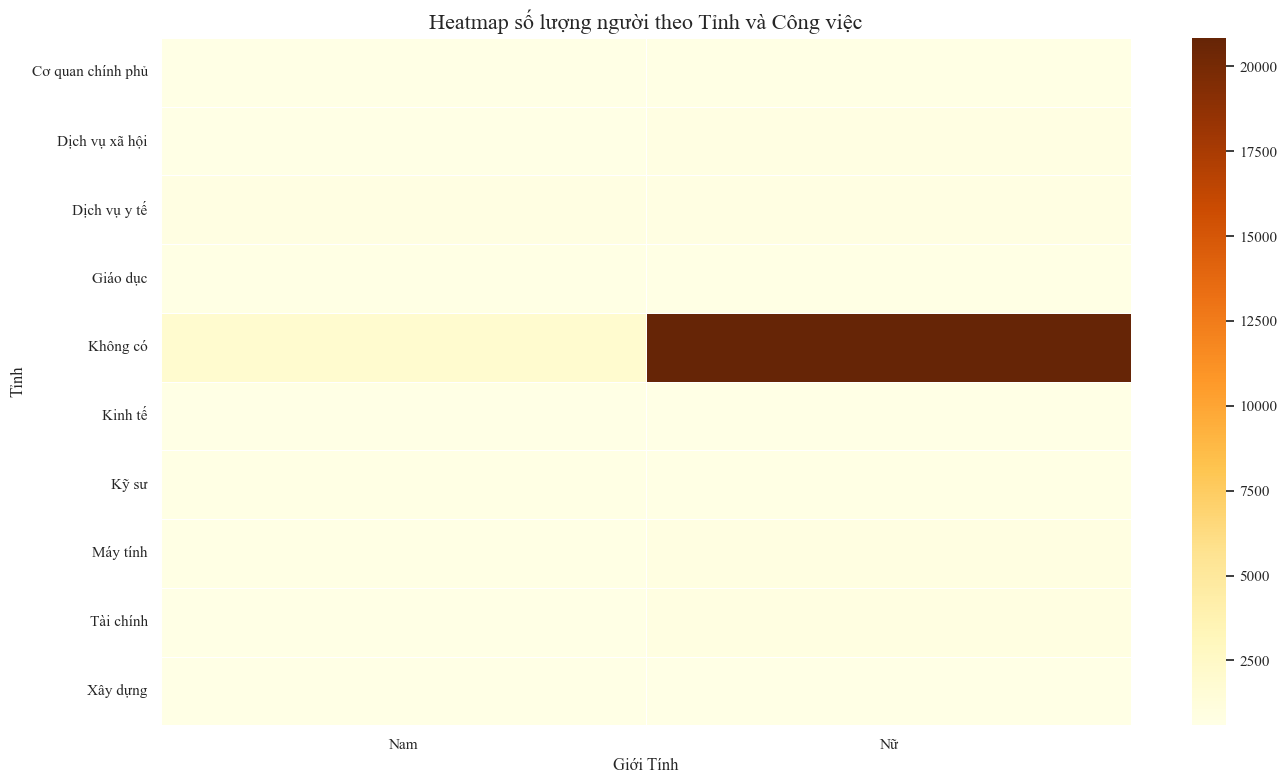

In [10]:
pivot_table = cinema.pivot_table(index='Lĩnh vực', columns='Giới Tính', aggfunc='size', fill_value=0)

# Vẽ heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, cmap='YlOrBr', linewidths=0.5, linecolor='white')

plt.title('Heatmap số lượng người theo Tỉnh và Công việc', fontsize=16)
#plt.xlabel('Tuổi')
plt.ylabel('Tỉnh')
plt.tight_layout()
plt.show()

In [11]:
cinema.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35474 entries, 0 to 35473
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Mã order             35474 non-null  object
 1   Thu ngân             35474 non-null  object
 2   Ngày bán             35474 non-null  object
 3   Tổng                 35474 non-null  object
 4   Ngày/tháng/năm sinh  35473 non-null  object
 5   Tuổi                 35473 non-null  object
 6   Giới Tính            35474 non-null  object
 7   Quận/Huyện           35411 non-null  object
 8   Tỉnh                 35411 non-null  object
 9   Công việc            35474 non-null  object
 10  Lĩnh vực             35474 non-null  object
 11  Mã khách hàng        35474 non-null  object
 12  Mã vé                35474 non-null  int64 
 13  Ngày                 35474 non-null  object
 14  Thời gian            35474 non-null  object
 15  Chỗ ngồi             35474 non-null  object
 16  Phòn

# Phân tích vé và doanh thu
Line chart doanh thu theo ngày	Xem trend bán vé
Bar chart giá vé theo loại vé hoặc loại chỗ	Giá trung bình cho từng loại
Scatter plot giữa tuổi khách và giá vé	Người trẻ hay lớn tuổi mua vé đắt hơn?

# Phân tích phim
Bar chart thể loại phim	Thể loại nào được xem nhiều nhất
Bar chart phân loại phim	Phân loại nào phổ biến (PG, R,...)
Boxplot thời lượng theo thể loại	Các thể loại có thời lượng chênh lệch ra sao

# Phân tích bắp ngô
Pie chart có mua bắp/ngô không	Phần trăm khách hàng mua combo
Bar chart tỷ lệ mua bắp theo giới tính hoặc tuổi	Nhóm nào thích ăn bắp nhất